## Neural Network Desigining

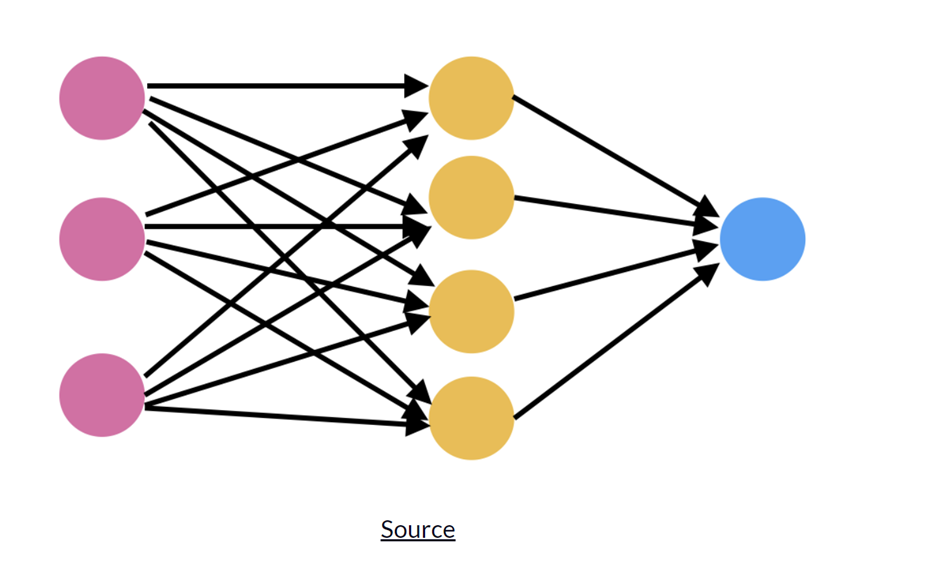

•	Coloured portion are called Neurons

•	These neurons are nothing but mathematical functions which, when given some input, generate an output. 

•	The output of neurons depends on the input and the parameters of the neurons. We can update these parameters to get a desired value out of the network.

•	Each neuron is defined by the sigmoid functions which gives the value between 0 and 1,from which the input it gets.

•	These sigmoid functions are connected to each other to create a neural network. This neural network is made till the final layer ,till we get the final layer,which at last created the cost function

•	So at the end we are here to create a model which has a minimum cost function, which shows the difference between the truth valure and predicted values

•	Algorithms such as gradient descent and stochastic gradient descent are used to update the parameters of the neural network. 


### Backward propogation

•	We also use backpropgation in this model learning as it adjusts the weights and biasis of the connections between neurons.

•	After each prediction backward propogation , and we udpadte the weights till we get the min cost function,ie accuate predicted value.


### Initializing parameters-

•	We need to initialize two parameters for each of the neurons in each layer: 1) Weight and 2) Bias.

•	We apply sigmoid functions to the next layer ,by combining this bias and weigths


### Initializing the first layer-


In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def init_params(layer_dims):
    np.random.seed(3)
    params = {}
    L = len(layer_dims)
    
    for l in range(1, L):
        params['W'+str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*0.01
        params['b'+str(l)] = np.zeros((layer_dims[l], 1))
        
    return params

### defining the sigmoid function

•	The sigmoid functions will give an z value, which is called linear hypothesis.

•	Sigmoid function falls int category of activation funtions,which shape out the output of the neuron


In [23]:
# Z (linear hypothesis) - Z = W*X + b , 
# W - weight matrix, b- bias vector, X- Input 

"""def sigmoid(Z):
	A = 1/(1+np.exp(np.dot(-1, Z)))
    cache = (Z)
    
    return A, cache"""
    
# this is an inbuilt function

'def sigmoid(Z):\n\tA = 1/(1+np.exp(np.dot(-1, Z)))\n    cache = (Z)\n    \n    return A, cache'

### fordward propogation


In [24]:
def forward_prop(X, params):
    
    A = X # input to first layer i.e. training data
    caches = []
    L = len(params)//2
    for l in range(1, L+1):
        A_prev = A
        
        # Linear Hypothesis
        Z = np.dot(params['W'+str(l)], A_prev) + params['b'+str(l)] 
        
        # Storing the linear cache
        linear_cache = (A_prev, params['W'+str(l)], params['b'+str(l)]) 
        
        # Applying sigmoid on linear hypothesis
        A, activation_cache = sigmoid(Z) 
        
         # storing the both linear and activation cache
        cache = (linear_cache, activation_cache)
        caches.append(cache)
    
    return A, caches

### defining a cost function

In [25]:
def cost_function(A, Y):
    m = Y.shape[1]
    
    cost = (-1/m)*(np.dot(np.log(A), Y.T) + np.dot(log(1-A), 1-Y.T)) 
    
    return cost

The value of cost function decreases the better the model will work

Algorithm like gradient function is used to update these values in such a way that cost function is minimized.

Gradient values are calculated for each neuron in the network and it represents the change in the final output with respect to the change in the parameters of that particular neuron.

## creating a backward propogation for a single layer

### finding the derivative parameters dA_prev, dW, db

In [26]:
def one_layer_backward(dA, cache):
    linear_cache, activation_cache = cache
    
    Z = activation_cache
    dZ = dA*sigmoid(Z)*(1-sigmoid(Z)) # The derivative of the sigmoid function
    
    A_prev, W, b = linear_cache
    m = A_prev.shape[1]
    
    dW = (1/m)*np.dot(dZ, A_prev.T)
    db = (1/m)*np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

* It calculates the gradient values for sigmoid units of one layer using the cache values we stored previously. 

* In the activation cache we have stored the value of Z for that layer.

* Using this value we will calculate the dZ, which is the derivative of the cost function with respect to the linear output of the given neuron.

* Once we have calculated all of that, we can calculate dW, db and dA_prev, which are the derivatives of cost function with respect the weights, biases and previous activation respectively. 

In [27]:
def backprop(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    dAL = -(np.divide(Y, AL) - np.divide(1-Y, 1-AL))
    
    current_cache = caches[L-1]
    grads['dA'+str(L-1)], grads['dW'+str(L-1)], grads['db'+str(L-1)] = one_layer_backward(dAL, current_cache)
    
    for l in reversed(range(L-1)):
        
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = one_layer_backward(grads["dA" + str(l+1)], current_cache)
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        
    return grads

After that we will use this code to implement backpropagation for the entire neural network. The function backprop implements the code for that. Here, we have created a dictionary for mapping gradients to each layer.

### updating the parameters


In [28]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    
    for l in range(L):
        parameters['W'+str(l+1)] = parameters['W'+str(l+1)] -learning_rate*grads['W'+str(l+1)]
        parameters['b'+str(l+1)] = parameters['b'+str(l+1)] -  learning_rate*grads['b'+str(l+1)]
        
    return parameters

### training the model

In [29]:
def train(X, Y, layer_dims, epochs, lr):
    params = init_params(layer_dims)
    cost_history = []
    
    for i in range(epochs):
        Y_hat, caches = forward_prop(X, params)
        cost = cost_function(Y_hat, Y)
        cost_history.append(cost)
        grads = backprop(Y_hat, Y, caches)
        
        params = update_parameters(params, grads, lr)
        
        
    return params, cost_history

This function will go through all the functions step by step for a given number of epochs. After finishing that, it will return the final updated parameters and the cost history. Cost history can be used to evaluate the performance of your network architecture.